In [25]:
import numpy as np
import os
import base64
import re
import sqlite3
import time
from datetime import datetime
from flask import Flask, request, jsonify, g
from tensorflow.keras.models import load_model # load_model para cargar todo de una vez
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import io
import sys
import requests
from PIL import Image
import json
import cv2



In [ ]:

image_path = r"..\Mini_base_datos\TCGA_CS_4941_19960909_14.tif"

with open(image_path, 'rb') as f:
    response = requests.post(
        'http://127.0.0.1:5000/predict',
        files={'image': (image_path, f, 'image/tiff')}
    )

print("Status:", response.status_code)
print("Respuesta:", response.text)

Status: 200
Respuesta: {
  "confidence": "100.00%",
  "prediction": "Detectado(1)",
  "prediction_id": 25,
  "success": true
}



In [ ]:
# La predicción de la imagen enviada en la celda anterior

# 1. POST - enviar imagen
image_path = r"..\Mini_base_datos\TCGA_CS_4941_19960909_1.tif"

with open(image_path, 'rb') as f:
    post_response = requests.post(
        'http://127.0.0.1:5000/predict',
        files={'image': (image_path, f, 'image/tiff')}
    )

post_result = post_response.json()
print("POST:", post_result)

# 2. GET - consultar la misma predicción automáticamente
prediction_id = post_result['prediction_id']
get_response = requests.get(f'http://127.0.0.1:5000/predict/{prediction_id}') #aquí pondiramos el id de la imagen de la celda anterior
print("GET:", get_response.json())

POST: {'confidence': '100.00%', 'prediction': 'No detectado (0)', 'prediction_id': 27, 'success': True}
GET: {'confidence': 1.0, 'corrected_label': None, 'date': '2025-12-07T19:29:15.476405', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_1.tif', 'id': 27, 'predicted_class': 'No detectado (0)'}


In [ ]:

response = requests.get('http://127.0.0.1:5000/predict/random')
print(response.json())

{'confidence': '99.99%', 'filename': 'TCGA_CS_4941_19960909_10.tif', 'prediction': 'No detectado (0)'}



    <!DOCTYPE html>
    <html>
    <head>
        <title>Brain Tumor Detection</title>
        <style>
            body { font-family: Arial; text-align: center; padding: 20px; background: #f0f0f0; }
            .container { background: white; padding: 30px; border-radius: 10px; max-width: 600px; margin: auto; }
            img { max-width: 400px; border: 2px solid #333; border-radius: 5px; }
            .prediction { font-size: 24px; margin: 20px 0; padding: 15px; border-radius: 5px; }
            .detectado { background: #ffcccc; color: #cc0000; }
            .no-detectado { background: #ccffcc; color: #006600; }
            .confidence { font-size: 18px; color: #666; }
            .filename { font-size: 14px; color: #999; }
            .refresh { margin-top: 20px; padding: 10px 30px; font-size: 16px; cursor: pointer; }
        </style>
    </head>
    <body>
        <div class="container">
            <h1> Brain Tumor Detection</h1>
            
            <div class="prediction n
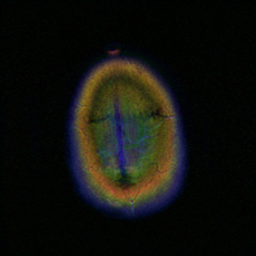

In [ ]:

response = requests.get('http://127.0.0.1:5000/predict/random/view')
print(response.text)

In [ ]:
base_url = 'http://127.0.0.1:5000'
response = requests.get(base_url + '/history')
print("Status:", response.status_code)
print("Response:", response.text)

Status: 200
Response: {
  "count": 10,
  "data": [
    {
      "confidence": 1.0,
      "corrected_label": null,
      "date": "2025-12-07T19:07:16.586884",
      "filename": "..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif",
      "id": 25,
      "predicted_class": "Detectado(1)"
    },
    {
      "confidence": 1.0,
      "corrected_label": null,
      "date": "2025-12-07T16:43:47.899667",
      "filename": "..\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_14.tif",
      "id": 24,
      "predicted_class": "Detectado(1)"
    },
    {
      "confidence": 1.0,
      "corrected_label": null,
      "date": "2025-12-07T13:31:55.238453",
      "filename": "imagen.png",
      "id": 23,
      "predicted_class": "No detectado (0)"
    },
    {
      "confidence": 1.0,
      "corrected_label": null,
      "date": "2025-12-07T13:30:46.284976",
      "filename": "imagen.png",
      "id": 22,
      "predicted_class": "No detectado (0)"
    },
    {
      "confidence": 1.0,
      "corrected_label

In [ ]:
feedback = {"correct_label": "Clase_1"}

response = requests.put(base_url + '/feedback/1', json=feedback)
print("Status:", response.status_code)
print("Response:", response.text)

Status: 400
Response: {
  "error": "Clase inv\u00e1lida. Use: ['No detectado (0)', 'Detectado(1)']"
}



In [7]:
# def train_model ---> serviría para reentrenar el modelo

base_url = 'http://127.0.0.1:5000'

train_config = {"epochs": 10, "learning_rate": 0.0005}

response = requests.post(base_url + '/admin/train', json=train_config)
print("Status:", response.status_code)
print("Response:", response.text)

Status: 200
Response: {
  "config_used": {
    "architecture": "ResNet50 (.keras)",
    "epochs": 10,
    "learning_rate": 0.0005
  },
  "message": "Entrenamiento finalizado (Simulado)",
  "new_version": "2.0.1765050634"
}

